This notebook generates visualizations of the study area, including the area of interest and the hydrologic zones of Colombia. It serves as a reference for spatial context in subsequent analyses.

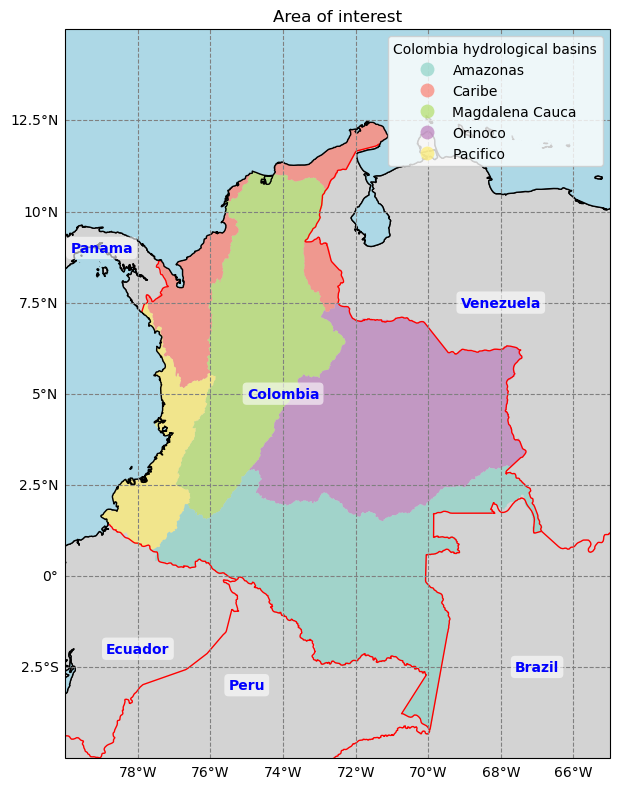

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import geopandas as gpd

# Define the region: Latitude from -80 to -65, Longitude from -5 to 15
lon_min, lon_max = -80, -65
lat_min, lat_max = -5, 15

exclude_countries = ['Aruba', 'Curaçao']

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, edgecolor='red')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels = False

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='50m',
                                        category='cultural',
                                        name=shapename)

# Add the three specified countries at the given coordinates
custom_labels = {
    'Venezuela': ( -68, 7.5),  # (lon, lat)
    'Peru': (-75, -3),
    'Brazil': (-67, -2.5),
    "Ecuador" : (-78, -2),
    "Colombia" : (-74, 5),
    "Panama" : (-79, 9)
}

for country, (lon, lat) in custom_labels.items():
    ax.text(lon, lat, country,
            fontsize=10, fontweight='bold', color='blue',
            transform=ccrs.PlateCarree(),
            ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3'))

shapefile_path = "/data/dl20-data/climate_operational/Victor_data/cuencas_colombia/"
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile with column "NOM_AH" (adjust if needed)
gdf.plot(column="NOM_AH", ax=ax, legend=True, cmap='Set3', linewidth=0.8, alpha=0.7)

leg = ax.get_legend()
if leg is not None:
    leg.set_title("Colombia hydrological basins") 

plt.title(f"Area of interest")
plt.tight_layout()
plt.show()